 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [367]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [368]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [369]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [370]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [371]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [372]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [373]:
# Drop nulls
algo_returns_filtered = algo_returns_df.dropna()
#algo_returns_filtered.isnull().sum()
algo_returns_filtered.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [374]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path('Resources/sp_tsx_history.csv')
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path,dtype={'Close':str},index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [375]:
# Check Data Types

sp_tsx_history_df.dtypes
#sp_tsx_history_df['Close'].apply(type).value_counts()
#sp_tsx_history_df['Date'].apply(type).value_counts()
#sp_tsx_history_df.value_counts().sum()


Close    object
dtype: object

In [376]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].replace({',':'','\$':''},regex=True).astype('float')
#sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$','',regex=True)
#sp_tsx_history_df.set_index(pd.to_datetime(sp_tsx_history_df['Date'], infer_datetime_format=True), inplace=True)
#sp_tsx_history_df.drop(columns=['Date'], inplace=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [377]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [378]:
# Drop nulls
sp_tsx_daily_returns_filtered = sp_tsx_daily_returns.dropna()

sp_tsx_daily_returns_filtered.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [379]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns_filtered.columns = ['S&P TSX 60 Returns']
sp_tsx_daily_returns_filtered.head()

,S&P TSX 60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [380]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_filtered,sp_tsx_daily_returns_filtered], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [381]:
# Plot daily returns of all portfolios
daily_returns = combined_df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.342692
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,1.184814


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

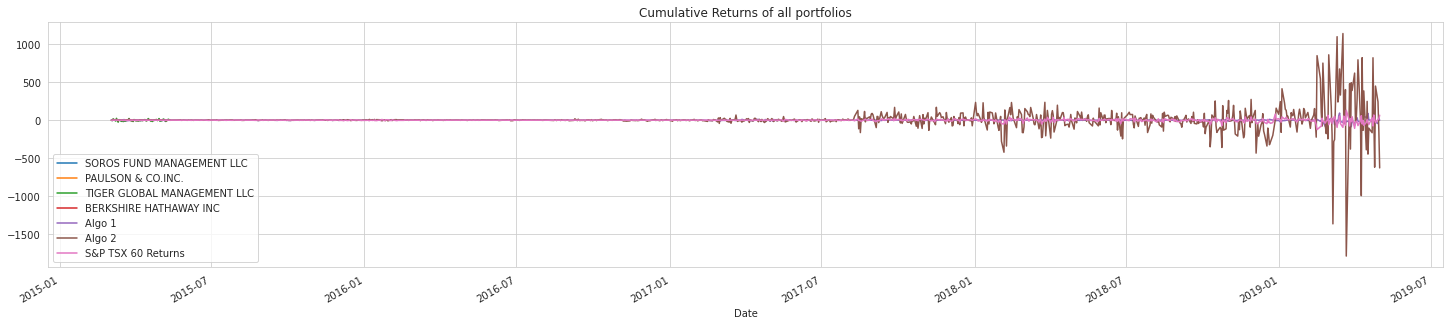

In [382]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,5), title="Cumulative Returns of all portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


/home/hkolli/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/hkolli/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/hkolli/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/hkolli/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot:>

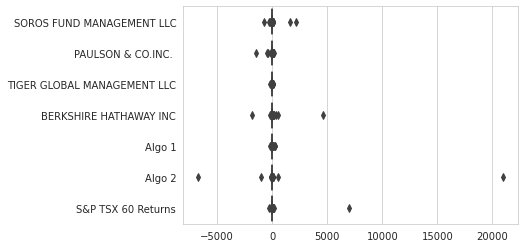

In [383]:
# Box plot to visually show risk
import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(data = daily_returns, orient = 'h', palette = 'Accent')


### Calculate Standard Deviations

In [384]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = daily_returns.std()
all_portfolio_std.dropna()

Algo 1                 16.093294
Algo 2                691.204890
S&P TSX 60 Returns    218.453393
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [385]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std_dev = sp_tsx_daily_returns_filtered.std()
# Determine which portfolios are riskier than the S&P TSX 60

algo_std_dev = algo_returns_filtered.std()
whale_std_dev = whale_returns_df.std()
all_std_dev = pd.concat([sp_tsx_std_dev,algo_std_dev,whale_std_dev], axis="rows", join="outer")
all_std_dev = all_std_dev.sort_values()
all_std_dev
#algo_std_dev
#sp_tsx_std_dev

S&P TSX 60 Returns             0.006637
PAULSON & CO.INC.              0.006977
SOROS FUND MANAGEMENT LLC      0.007842
Algo 1                         0.007988
Algo 2                         0.008466
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Calculate the Annualized Standard Deviation

In [386]:
# Calculate the annualized standard deviation (252 trading days)
volatility = all_portfolio_std * np.sqrt(252)
volatility.sort_values().dropna()

Algo 1                  255.473116
S&P TSX 60 Returns     3467.840108
Algo 2                10972.537460
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling std of all portfolios'}, xlabel='Date'>

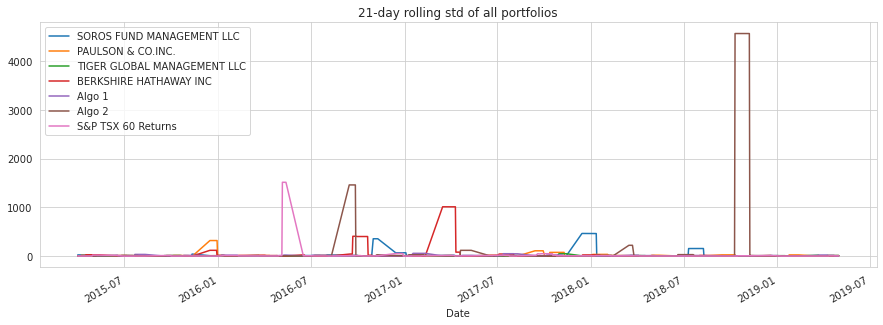

In [387]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_21 = daily_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
all_portfolio_21 = all_portfolio_21.dropna()
all_portfolio_21.plot(figsize=(15,5), title="21-day rolling std of all portfolios")


### Calculate and plot the correlation

<AxesSubplot:>

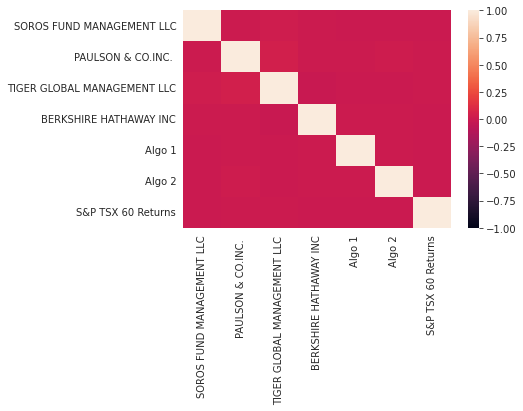

In [388]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [389]:
# Calculate covariance of a single portfolio
soros_covariance = daily_returns["SOROS FUND MANAGEMENT LLC"].cov(daily_returns["S&P TSX 60 Returns"])
paulson_covariance = daily_returns["PAULSON & CO.INC. "].cov(daily_returns["S&P TSX 60 Returns"])
tiger_covariance = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].cov(daily_returns["S&P TSX 60 Returns"])
berkshire_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].cov(daily_returns["S&P TSX 60 Returns"])
algo1_covariance = daily_returns["Algo 1"].cov(daily_returns["S&P TSX 60 Returns"])
algo2_covariance = daily_returns["Algo 2"].cov(daily_returns["S&P TSX 60 Returns"])

#covariance_all = matrix.cov(daily_returns["S&P TSX 60 Returns "])

# Calculate variance of S&P TSX
variance_sap = daily_returns["S&P TSX 60 Returns"].var()

# Computing beta
soros_beta =  soros_covariance / variance_sap
paulson_beta = paulson_covariance / variance_sap
tiger_beta = tiger_covariance / variance_sap
berkshire_beta = berkshire_covariance / variance_sap
algo1_beta = algo1_covariance / variance_sap
algo2_beta = algo2_covariance / variance_sap
# Plot beta trend



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21-day EWM of all portfolios'}, xlabel='Date'>

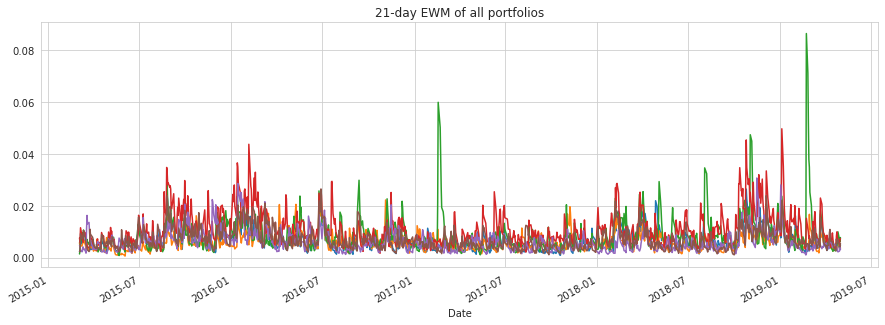

In [390]:
# Use `ewm` to calculate the rolling window
soros_21dayEWM = combined_df["SOROS FUND MANAGEMENT LLC"].ewm(halflife='21 days',times=combined_df.index).std()
paulson_21dayEWM = combined_df["PAULSON & CO.INC. "].ewm(halflife='21 days',times=combined_df.index).std()
tiger_21dayEWM = combined_df["TIGER GLOBAL MANAGEMENT LLC"].ewm(halflife='21 days',times=combined_df.index).std()
berkshire_21dayEWM = combined_df["BERKSHIRE HATHAWAY INC"].ewm(halflife='21 days',times=combined_df.index).std()
algo1_21dayEWM = combined_df["Algo 1"].ewm(halflife='21 days',times=combined_df.index).std()
algo2_21dayEWM = combined_df["Algo 2"].ewm(halflife='21 days',times=combined_df.index).std()

ax = soros_21dayEWM.plot(figsize=(15,5), title="21-day EWM of all portfolios")
paulson_21dayEWM.plot(ax=ax)
tiger_21dayEWM.plot(ax=ax)
berkshire_21dayEWM.plot(ax=ax)
algo1_21dayEWM.plot(ax=ax)
algo2_21dayEWM.plot(ax=ax)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [391]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.dropna()

<AxesSubplot:>

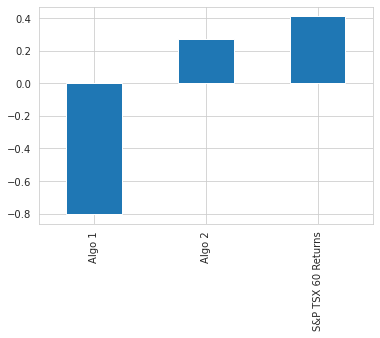

In [392]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.



S&P TSX 60 is offering better returns

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [393]:
# Reading data from 1st stock
l_df = pd.read_csv("./Resources/l_historical.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [394]:
# Reading data from 2nd stock
otex_df = pd.read_csv("./Resources/otex_historical.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [395]:
# Reading data from 3rd stock
shop_df = pd.read_csv("./Resources/shop_historical.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [396]:
# Combine all stocks in a single DataFrame
custom_combine_df = pd.concat([l_df, otex_df,shop_df], axis="columns", join="inner")
custom_combine_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [397]:
# Reset Date index
custom_combine_df = custom_combine_df.drop(columns=['Symbol'])


In [398]:
# Reorganize portfolio data by having a column per symbol
tickers = [['L','OTEX','SHOP']]
custom_combine_df.columns = tickers
custom_combine_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [399]:
# Calculate daily returns
custom_daily_returns = custom_combine_df.pct_change()
# Drop NAs
custom_daily_returns.dropna()
# Display sample data
custom_daily_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [400]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_return = custom_daily_returns.dot(weights)

# Display sample data
custom_portfolio_return.head()

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [401]:
# Join your returns DataFrame to the original returns DataFrame
custom_daily_returns['Portfolio Returns'] = portfolio_return
custom_daily_returns.head()

,L,OTEX,SHOP,Portfolio Returns
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997


In [402]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_daily_returns = custom_daily_returns.dropna()
custom_daily_returns.head()

,L,OTEX,SHOP,Portfolio Returns
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Annualized Standard Deviation'}>

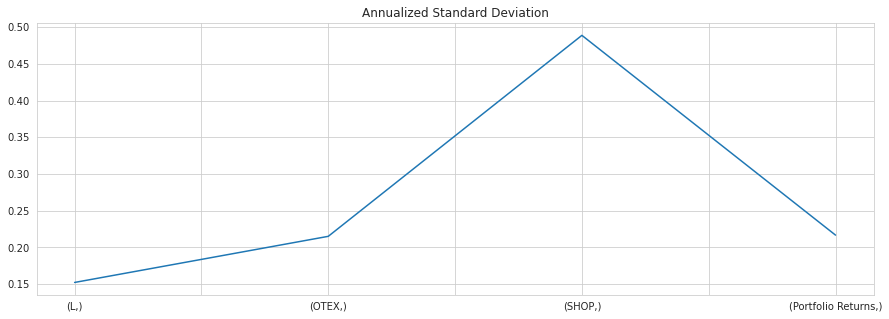

In [403]:
# Calculate the annualized `std`
custom_annualized_std = custom_daily_returns.std() * np.sqrt(252)
annualized_std.plot(figsize=(15,5),title="Annualized Standard Deviation")

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

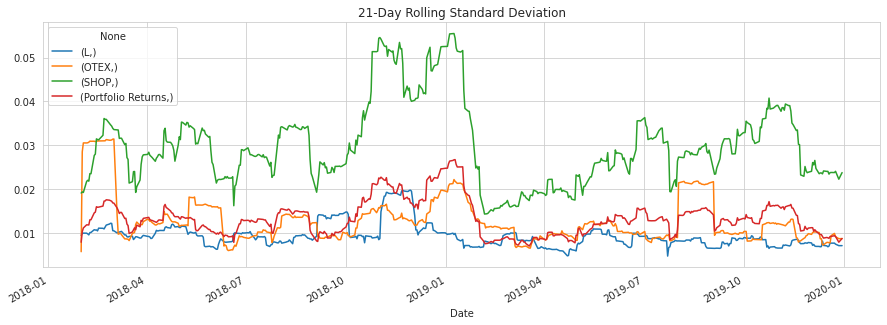

In [404]:
# Calculate rolling standard deviation
rolling_21day = custom_daily_returns.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_21day.plot(figsize=(15,5),title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:xlabel='None', ylabel='None'>

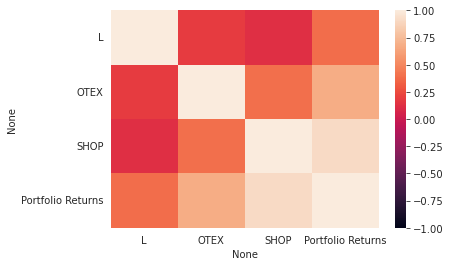

In [405]:
# Calculate and plot the correlation
correlation = custom_daily_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of L'}, xlabel='Date'>

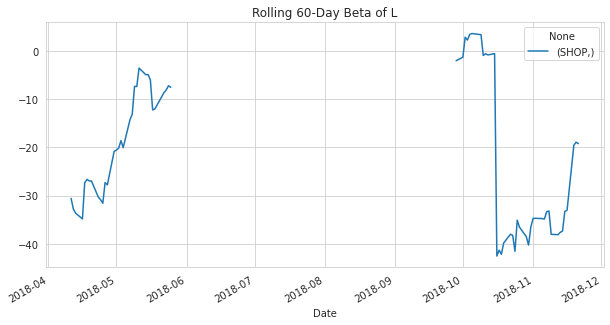

In [412]:
# Calculate and plot Beta
rolling_covariance_L = custom_daily_returns['L'].rolling(window=60).cov(daily_returns['S&P TSX 60 Returns'])


# Calculate 30-day rolling variance of L vs. S&P TSX 60 and plot the data
rolling_variance_L = custom_daily_returns['L'].rolling(window=60).var()


# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta_L = rolling_covariance_L / rolling_variance_L
rolling_beta_L.plot(figsize=(10, 5), title='Rolling 60-Day Beta of L')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [414]:
# Calculate Annualized Sharpe Ratios
custom_sharpe_ratios = (custom_daily_returns.mean() * 252) / (custom_daily_returns.std() * np.sqrt(252))
custom_sharpe_ratios = custom_sharpe_ratios.dropna()

<AxesSubplot:title={'center':'Sharpe ratio of custom portfolio'}>

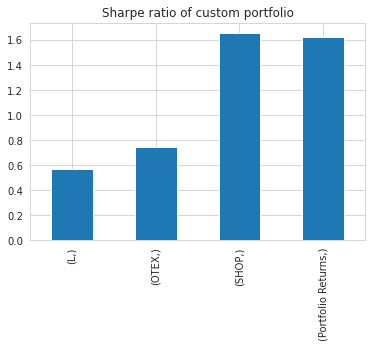

In [416]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind='bar', title="Sharpe ratio of custom portfolio")

### How does your portfolio do?

Write your answer here!

All stocks in custom portfolio are positive and returns are very good.